# Ejercicio de pruebas con dataset de pingüinos

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

import numpy as np
import pandas as pd

penguins = sns.load_dataset('penguins')
# Pequeño preprocesamiento para eliminar filas con datos faltantes
penguins_clean = penguins.dropna() # Borra filas que no tengan datos para alguna columna
data = penguins_clean[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
4,36.7,19.3,193.0,3450.0,Adelie
5,39.3,20.6,190.0,3650.0,Adelie
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,Gentoo
340,46.8,14.3,215.0,4850.0,Gentoo
341,50.4,15.7,222.0,5750.0,Gentoo
342,45.2,14.8,212.0,5200.0,Gentoo


In [17]:
labels = penguins_clean['species'].astype('category').cat.codes
labels # Categorías originales como números

,0
0,0
1,0
2,0
4,0
5,0
...,...
338,2
340,2
341,2
342,2


In [16]:
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(data.iloc[:, 0:4])
datos_normalizados

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

In [42]:
# Aplicar algoritmo aglomerativo
agglo = AgglomerativeClustering(n_clusters=3) # por defecto aplica ward
agglo.fit(datos_normalizados)

agglo2 = AgglomerativeClustering(n_clusters=3)
agglo2.fit(data.iloc[:, 0:4])

AgglomerativeClustering(n_clusters=3)

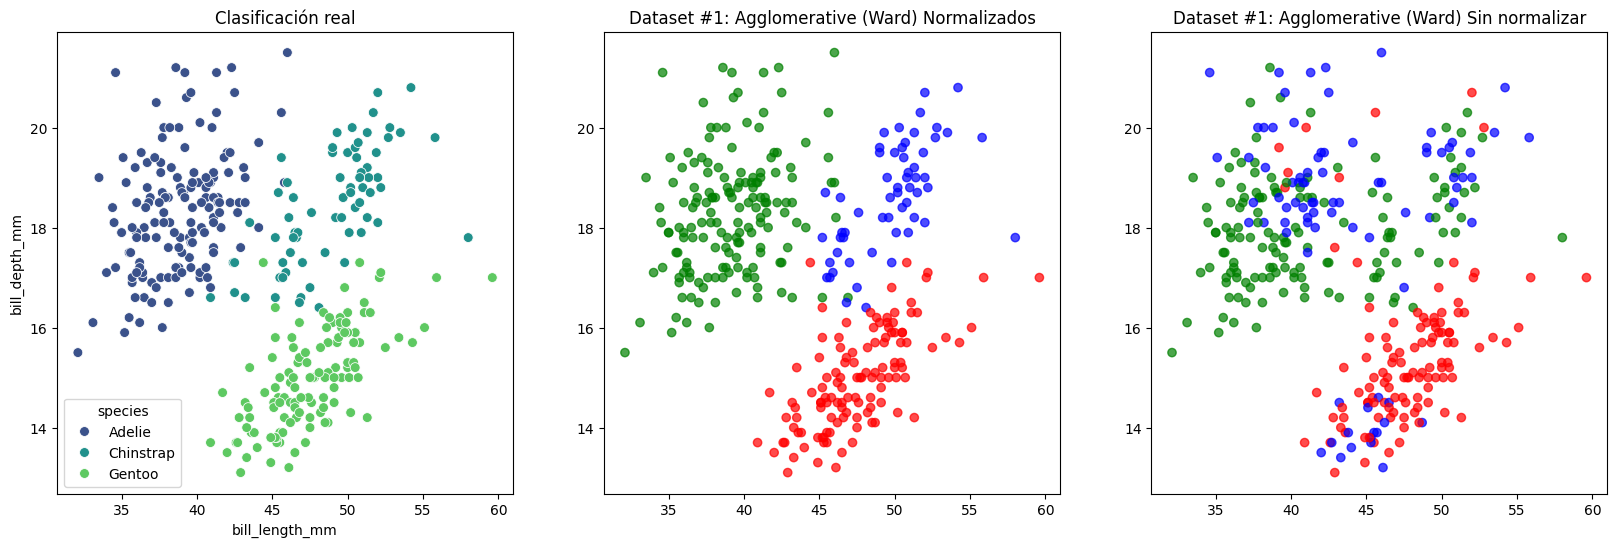

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

myColors={0:'red', 1:'green', 2:'blue'}
axes[1].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[1].set_title('Dataset #1: Agglomerative (Ward) Normalizados')

myColors={0:'red', 1:'green', 2:'blue'}
axes[2].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(agglo2.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[2].set_title('Dataset #1: Agglomerative (Ward) Sin normalizar')
plt.show()

In [45]:
# Aplicar algoritmo k-means
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(datos_normalizados)

kmeans2 = KMeans(n_clusters=3, n_init=10)
kmeans2.fit(data.iloc[:,0:4])

KMeans(n_clusters=3, n_init=10)

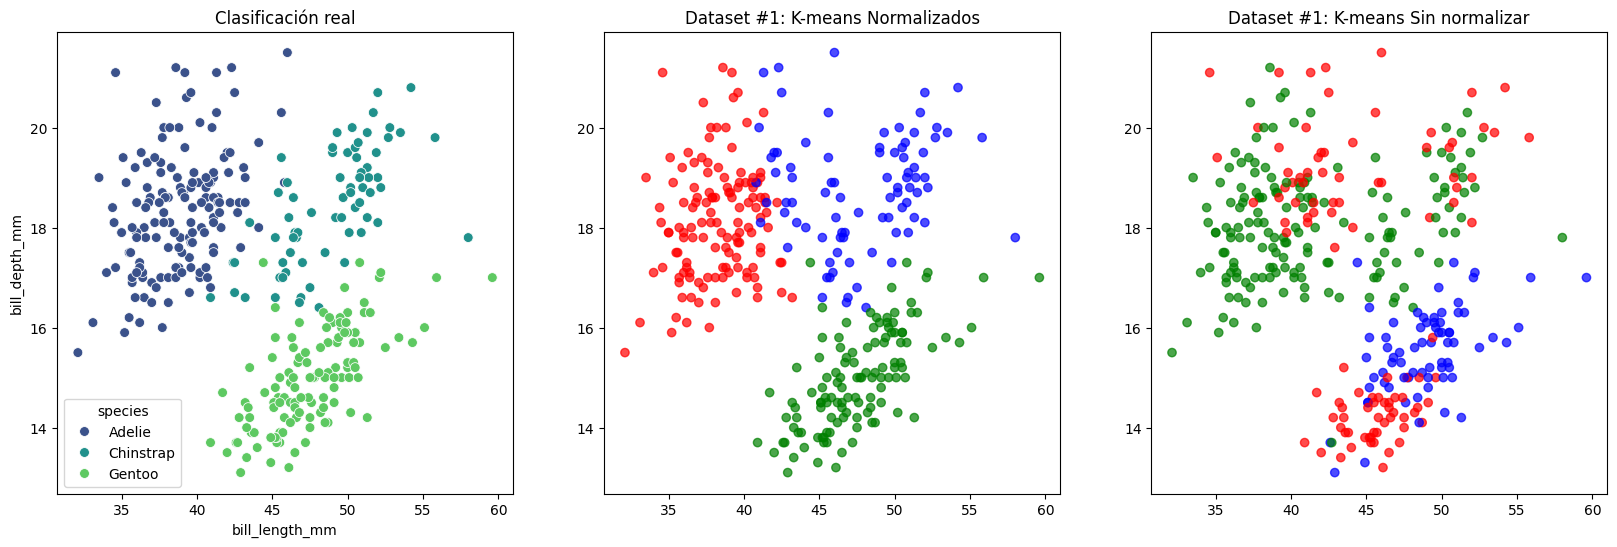

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.scatterplot(data=data, x='bill_length_mm', y='bill_depth_mm', hue='species', ax=axes[0], palette='viridis', s=50)
axes[0].set_title('Clasificación real')

myColors={0:'red', 1:'green', 2:'blue'}
axes[1].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[1].set_title('Dataset #1: K-means Normalizados')

myColors={0:'red', 1:'green', 2:'blue'}
axes[2].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(kmeans2.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[2].set_title('Dataset #1: K-means Sin normalizar')
plt.show()

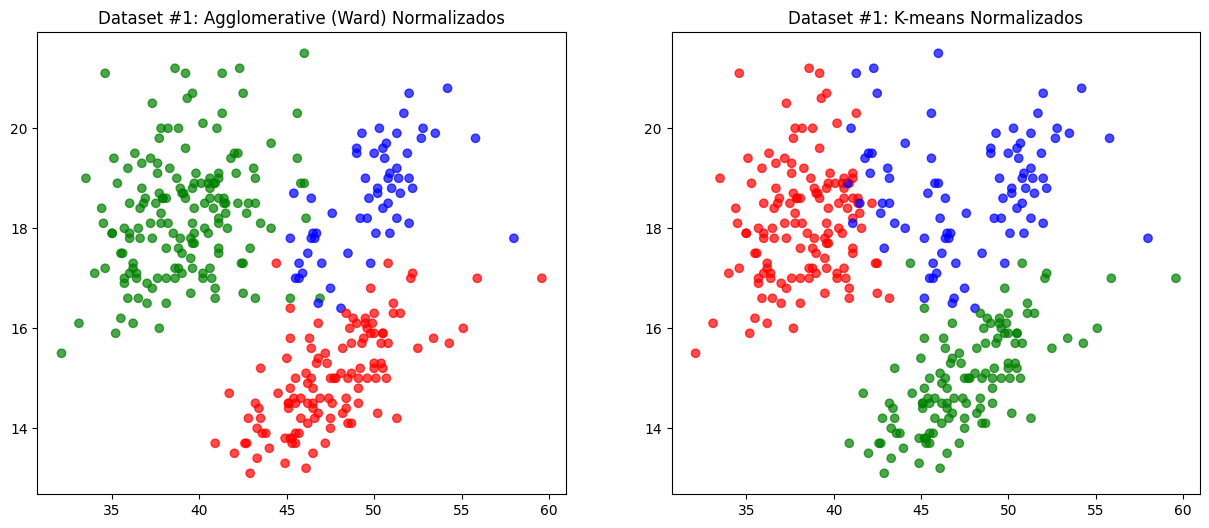

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

myColors={0:'red', 1:'green', 2:'blue'}
axes[0].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[0].set_title('Dataset #1: Agglomerative (Ward) Normalizados')

myColors={0:'red', 1:'green', 2:'blue'}
axes[1].scatter(data.iloc[:,0], data.iloc[:,1], c=pd.Series(kmeans.labels_).apply(lambda x: myColors[x]), alpha=0.7)
axes[1].set_title('Dataset #1: K-means Normalizados')

plt.show()
